<a href="https://colab.research.google.com/github/Farzana2025/hello-world/blob/main/NBA_in_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Historic NBA Drafting, Game, and Player Analysis**


Player Backgraound and salary analysis


Importing libraries

In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly as pt
import os

 connecting with NBA database

In [10]:
db_path = '/content/basketball.sqlite'
connection = sql.connect(db_path) # eate connection object to database
print("SQL database connected")
table = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", connection)
print(table)

SQL database connected
                     name
0                  Player
1                    Team
2         Team_Attributes
3            Team_History
4       Player_Attributes
5          Game_Officials
6   Game_Inactive_Players
7             Team_Salary
8           Player_Salary
9                   Draft
10          Draft_Combine
11          Player_Photos
12            Player_Bios
13                   Game
14                   News
15           News_Missing


loading necessary dataset from sql to python if needed

In [12]:
query1 = """
    SELECT * from player
"""
player = pd.read_sql(query1, connection)
print(player)

           id            full_name first_name     last_name  is_active
0       76001       Alaa Abdelnaby       Alaa     Abdelnaby          0
1       76002      Zaid Abdul-Aziz       Zaid    Abdul-Aziz          0
2       76003  Kareem Abdul-Jabbar     Kareem  Abdul-Jabbar          0
3          51   Mahmoud Abdul-Rauf    Mahmoud    Abdul-Rauf          0
4        1505    Tariq Abdul-Wahad      Tariq   Abdul-Wahad          0
...       ...                  ...        ...           ...        ...
4496  1627790           Ante Zizic       Ante         Zizic          1
4497    78647             Jim Zoet        Jim          Zoet          0
4498    78648            Bill Zopf       Bill          Zopf          0
4499  1627826          Ivica Zubac      Ivica         Zubac          1
4500    78650           Matt Zunic       Matt         Zunic          0

[4501 rows x 5 columns]


In [13]:
query2 = """
    SELECT * from Player_Attributes
"""
player_attributes = pd.read_sql(query2, connection)
print(player_attributes)

           ID FIRST_NAME     LAST_NAME   DISPLAY_FIRST_LAST  \
0       76001       Alaa     Abdelnaby       Alaa Abdelnaby   
1       76002       Zaid    Abdul-Aziz      Zaid Abdul-Aziz   
2       76003     Kareem  Abdul-Jabbar  Kareem Abdul-Jabbar   
3          51    Mahmoud    Abdul-Rauf   Mahmoud Abdul-Rauf   
4        1505      Tariq   Abdul-Wahad    Tariq Abdul-Wahad   
...       ...        ...           ...                  ...   
4495  1627790       Ante         Zizic           Ante Zizic   
4496    78647        Jim          Zoet             Jim Zoet   
4497    78648       Bill          Zopf            Bill Zopf   
4498  1627826      Ivica         Zubac          Ivica Zubac   
4499    78650       Matt         Zunic           Matt Zunic   

     DISPLAY_LAST_COMMA_FIRST  DISPLAY_FI_LAST          PLAYER_SLUG  \
0             Abdelnaby, Alaa     A. Abdelnaby       alaa-abdelnaby   
1            Abdul-Aziz, Zaid    Z. Abdul-Aziz      zaid-abdul-aziz   
2        Abdul-Jabbar, Kareem 

In [14]:
query3 = """
    SELECT * from Player_Salary
"""
player_salary = pd.read_sql(query3, connection)
print(player_salary)

     slugSeason            nameTeam         namePlayer    statusPlayer  \
0       2020-21       Atlanta Hawks  Bogdan Bogdanovic  current roster   
1       2021-22       Atlanta Hawks  Bogdan Bogdanovic  current roster   
2       2022-23       Atlanta Hawks  Bogdan Bogdanovic  current roster   
3       2023-24       Atlanta Hawks  Bogdan Bogdanovic  current roster   
4       2020-21       Atlanta Hawks    Brandon Goodwin  current roster   
...         ...                 ...                ...             ...   
1287    2020-21  Washington Wizards  Russell Westbrook  current roster   
1288    2021-22  Washington Wizards  Russell Westbrook  current roster   
1289    2022-23  Washington Wizards  Russell Westbrook  current roster   
1290    2020-21  Washington Wizards      Thomas Bryant  current roster   
1291    2021-22  Washington Wizards      Thomas Bryant  current roster   

      isFinalSeason  isWaived  isOnRoster  isNonGuaranteed  isTeamOption  \
0                 0         0      

In [16]:
query4 = """
    SELECT * from Player_Bios
"""
player_bios = pd.read_sql(query4, connection)


Merging players, players_salary and players attribute into one table

In [31]:
dataset_query= """
                select s.namePlayer as player_name,
                s.nameTeam as team_name,
                s.statusPlayer as player_status,
                round(s.value/1000000) as salary,
                2024 - strftime('%Y', a.BIRTHDATE) as age,
                a.school as player_school,
                a.DRAFT_YEAR as draft_year,
                2024 - a.DRAFT_YEAR as experience,
                a.POSITION as game_position,
                a.AST AS assists,
                a.REB AS rebounds,
                a.pts as player_point
                from Player_Attributes a
                join player p
                on a.ID = p.id
                join Player_Salary s
                on s.namePlayer = p.full_name
                WHERE slugSeason = '2023-24'
                ORDER BY salary DESC
                LIMIT 50;
                """
top_salary_player = pd.read_sql(dataset_query, connection)
print(top_salary_player)

              player_name               team_name   player_status  salary  \
0             Paul George    Los Angeles Clippers  current roster    46.0   
1   Giannis Antetokounmpo         Milwaukee Bucks  current roster    46.0   
2          Damian Lillard  Portland Trail Blazers  current roster    46.0   
3           Klay Thompson   Golden State Warriors  current roster    43.0   
4           Anthony Davis      Los Angeles Lakers  current roster    41.0   
5             Rudy Gobert               Utah Jazz  current roster    41.0   
6         Khris Middleton         Milwaukee Bucks  current roster    40.0   
7           Tobias Harris      Philadelphia 76ers  current roster    39.0   
8             Ben Simmons      Philadelphia 76ers  current roster    38.0   
9           Pascal Siakam         Toronto Raptors  current roster    38.0   
10     Kristaps Porzingis        Dallas Mavericks  current roster    36.0   
11           Jrue Holiday         Milwaukee Bucks  current roster    36.0   

Top 10 player

In [32]:
print(top_salary_player.head(10))

             player_name               team_name   player_status  salary  age  \
0            Paul George    Los Angeles Clippers  current roster    46.0   34   
1  Giannis Antetokounmpo         Milwaukee Bucks  current roster    46.0   30   
2         Damian Lillard  Portland Trail Blazers  current roster    46.0   34   
3          Klay Thompson   Golden State Warriors  current roster    43.0   34   
4          Anthony Davis      Los Angeles Lakers  current roster    41.0   31   
5            Rudy Gobert               Utah Jazz  current roster    41.0   32   
6        Khris Middleton         Milwaukee Bucks  current roster    40.0   33   
7          Tobias Harris      Philadelphia 76ers  current roster    39.0   32   
8            Ben Simmons      Philadelphia 76ers  current roster    38.0   28   
9          Pascal Siakam         Toronto Raptors  current roster    38.0   30   

      player_school draft_year  experience   game_position  assists  rebounds  \
0      Fresno State       2

We can see out of top 10 players


*   Majority are of age of >30
*   Has experience >10
*   Has point >20
*   Majority has forward position
*Majority has salary more than 40 Millions
* Player with highest salary and point has 6.4 assist and rebounds 11.7
*Damian Lillard has highest assit with salary 45640084.0




In [33]:
import matplotlib.pyplot as plt
import seaborn as sns




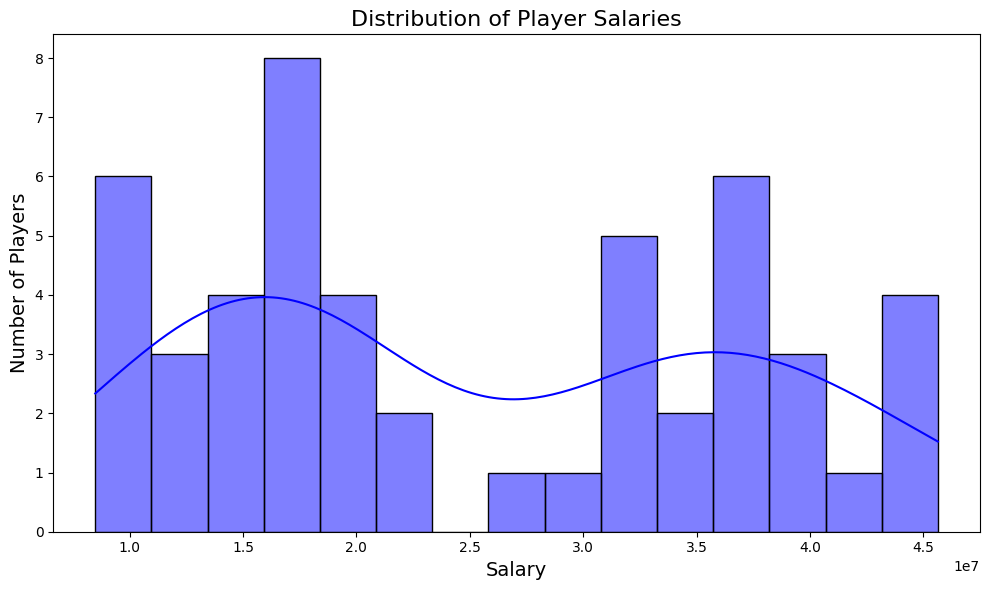

In [28]:
# Assuming 'top_salary_player' is your DataFrame and 'salary' is the column containing salary data.
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(data=top_salary_player, x='salary', bins=15, kde=True, color='blue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of Player Salaries', fontsize=16)
plt.xlabel('Salary', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [34]:
import matplotlib.pyplot as plt

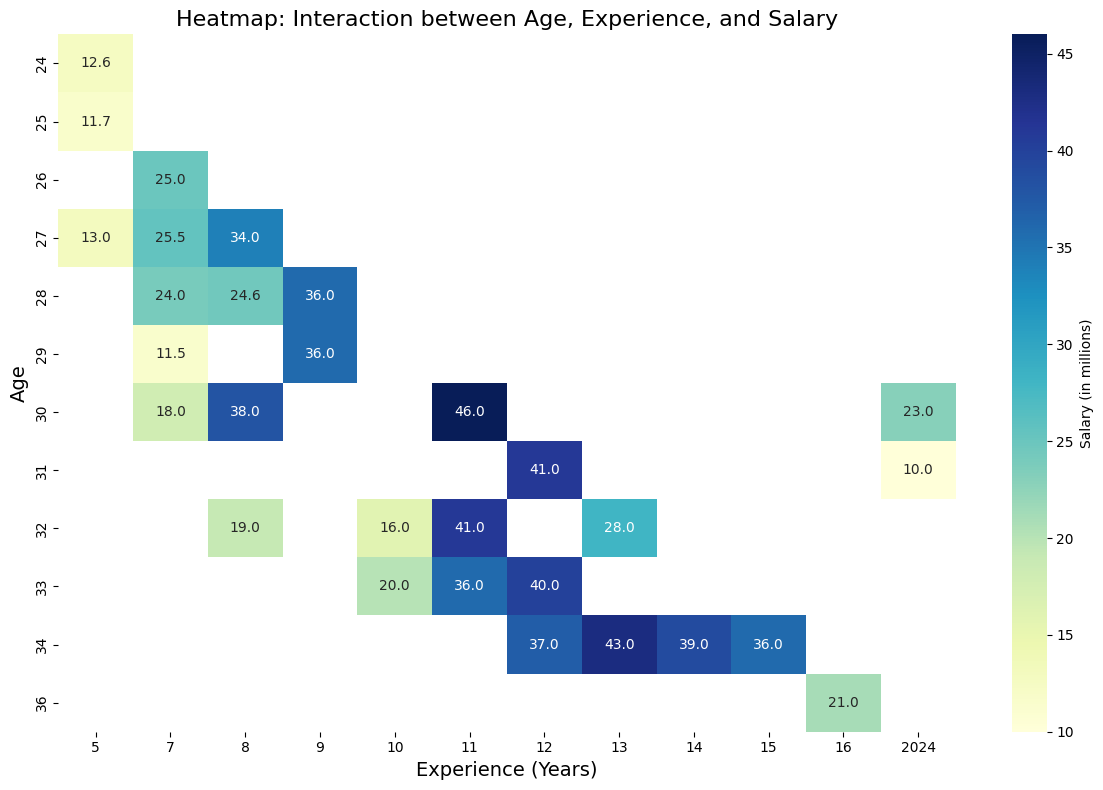

In [35]:

# Assuming 'top_salary_player' is your DataFrame
# Create a pivot table for heatmap
heatmap_data = top_salary_player.pivot_table(
    index='age',
    columns='experience',
    values='salary',
    aggfunc='mean'
)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap='YlGnBu',
    cbar_kws={'label': 'Salary (in millions)'}
)

# Add titles and labels
plt.title('Heatmap: Interaction between Age, Experience, and Salary', fontsize=16)
plt.xlabel('Experience (Years)', fontsize=14)
plt.ylabel('Age', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

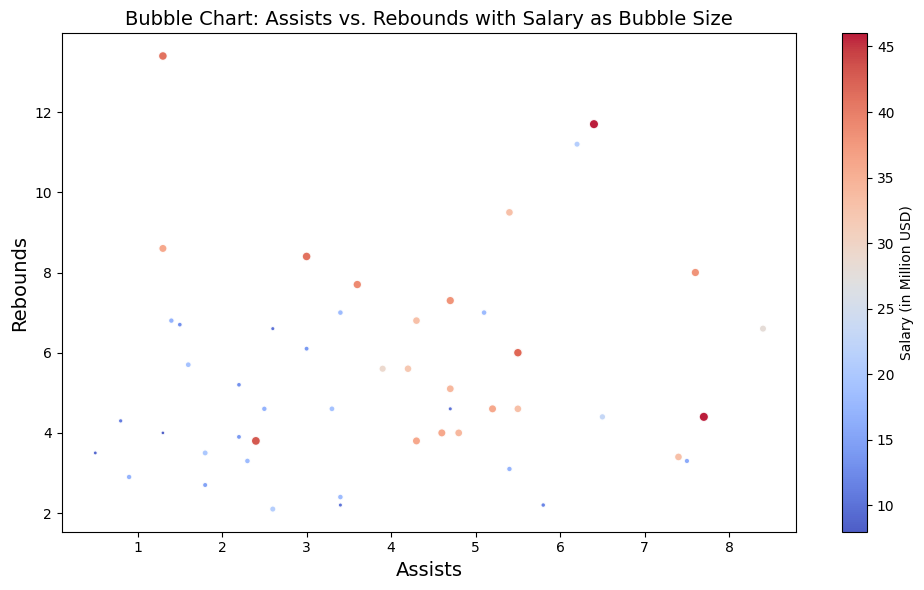

In [40]:
plt.figure(figsize=(10, 6))

# Plot bubble chart
plt.scatter(
    x=top_salary_player['assists'],    # X-axis: Assists
    y=top_salary_player['rebounds'],   # Y-axis: Rebounds
    s=top_salary_player['salary'],  # Size of bubbles: Salary (scaled for better visualization)
    c=top_salary_player['salary'],     # Color by salary
    cmap='coolwarm',                   # Color map
    alpha=0.9,                         # Transparency of bubbles
    edgecolors="w",                    # White border around bubbles
)

# Add titles and labels
plt.title('Bubble Chart: Assists vs. Rebounds with Salary as Bubble Size', fontsize=14)
plt.xlabel('Assists', fontsize=14)
plt.ylabel('Rebounds', fontsize=14)

# Add color bar
plt.colorbar(label='Salary (in Million USD)')

# Show the plot
plt.tight_layout()
plt.show()

In [45]:
import folium
from folium.plugins import MarkerCluster
# Assuming 'team_coordinates' is a DataFrame with team names and their geographic coordinates (latitude, longitude)
# Example:
team_coordinates = pd.DataFrame({
    'team_name': ['Milwaukee Bucks', 'Los Angeles Clippers', 'Portland Trail Blazers', 'Golden State Warriors', 'Utah Jazz', 'Los Angeles Lakers'],
    'latitude': [43.0731, 34.0522, 45.5122, 37.7749, 40.7608, 34.0522],
    'longitude': [-87.9161, -118.2437, -122.6587, -122.4194, -111.8910, -118.2437]
})

# Get the highest-paid player salary per team (already available in your top_salary_player DataFrame)
highest_paid_player = top_salary_player.groupby('team_name').agg({'salary': 'max'}).reset_index()

# Merge the team coordinates and the highest salary data
team_map_data = pd.merge(team_coordinates, highest_paid_player, on='team_name', how='left')



In [47]:
# Create a folium map centered at a default location
m = folium.Map(location=[37.7749, -122.4194], zoom_start=4)

# Create a marker cluster to group markers on zoom
marker_cluster = MarkerCluster().add_to(m)

# Define a color scale based on the salary range
from folium import plugins
from branca.colormap import linear

# Create a color map based on salary range
colormap = linear.YlGnBu_09.scale(team_map_data['salary'].min(), team_map_data['salary'].max())

# Add team markers to the map
for idx, row in team_map_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=10,
        color=colormap(row['salary']),
        fill=True,
        fill_color=colormap(row['salary']),
        fill_opacity=0.7,
        popup=f"{row['team_name']}<br>Salary: ${row['salary']:,.0f}",
    ).add_to(marker_cluster)

# Add color scale legend
colormap.add_to(m)

# Display the map
m.save('nba_team_salary_map.html')

